## Task - 1: Implementation of MCP Neurons:

#### Design a MCP Neuron for ”AND” Boolean Functions and ”OR” Boolean Functions with two inputs:

##### For ”AND” Operations

In [ ]:
def MCP_Neurons_AND(X1, X2, T):
    """
    This function implements basic AND operations with MCP Neuron for two inputs.
    Arguments:
    Inputs:
    X1 (1D array): An array of binary values.
    X2 (1D array): An array of binary values.
    T (int): Threshold value.
    Output:
    state_neuron (1D list): The state of the neuron (1 or 0) for the particular inputs.
    """
    assert len(X1) == len(X2)
    state_neuron = []

    for i in range(len(X1)):
        if (X1[i] + X2[i]) >= T:
            state_neuron.append(1)
        else:
            state_neuron.append(0)

    return state_neuron

##### Sample Usage for ”AND” Function.

In [ ]:
# Example usage for MCP_Neurons_AND function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 2 # Threshold value
result = MCP_Neurons_AND(X1, X2, T)
print(f"Output of AND gate for inputs {X1} and {X2} with threshold {T}: {result}")

Output of AND gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 2: [0, 0, 0, 1]


##### For ”OR” Operations.

In [ ]:
def MCP_Neurons_OR(X1, X2, T):
    """
    This function implements basic OR operations with MCP Neuron for two inputs.
    Arguments:
    Inputs:
    X1 (1D array): An array of binary values.
    X2 (1D array): An array of binary values.
    T (int): Threshold value.
    Output:
    state_neuron (1D list): The state of the neuron (1 or 0) for the particular inputs.
    """
    assert len(X1) == len(X2)
    state_neuron = []

    for i in range(len(X1)):
        if (X1[i] + X2[i]) >= T:
            state_neuron.append(1)
        else:
            state_neuron.append(0)

    return state_neuron

##### Sample Usage for ”OR” Function.

In [ ]:
# Example usage for MCP_Neurons_OR function
T_or = 1 # Threshold value for OR gate
result_or = MCP_Neurons_OR(X1, X2, T_or)
print(f"Output of OR gate for inputs {X1} and {X2} with threshold {T_or}: {result_or}")

Output of OR gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 1: [0, 1, 1, 1]


#### Answering the Questions:
##### Question - 1: Limitations of MCP Neurons
1. MCP Neurons cannot solve problems that require non-linearly separable decision boundaries, such as the XOR function.
2. It only works with binary inputs and does not handle real-valued inputs efficiently.
3. It does not support learning; weights and thresholds must be hand-designed.
4. MCP Neurons are incapable of deep learning as they lack multiple layers and activation functions.
5. It cannot handle complex functions requiring multiple layers of neurons.

##### Question - 2: XOR Function using MCP Neuron
The XOR function cannot be implemented directly using a single MCP neuron because it is not linearly separable.
However, we can use a combination of MCP neurons to implement XOR as follows:
1. Use an MCP neuron to compute the AND function.
2. Use another MCP neuron to compute the OR function.
3. compute the NAND (NOT AND) function by using an additional MCP neuron.
4. Finally, compute XOR as: XOR = OR - AND (i.e., XOR = (X1 OR X2) AND NOT(X1 AND X2))

## Task 2 - Task 2: Perceptron Algorithm for 0 vs 1 Classification.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


#### 1.Loading the Dataset:

In [ ]:
import pandas as pd
import numpy as np
df_0_1 = pd.read_csv(r"/content/drive/MyDrive/2025 - 6CS012 - AI and ML - Student/Week - 3 - Getting Started with Deep Learning and Neural Network/mnist_0_and_1.csv")
# Extract features and labels
X = df_0_1.drop(columns=["label"]).values # 784 pixels
y = df_0_1["label"].values # Labels (0 or 1)
# Check the shape of the features and labels
print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)

Feature matrix shape: (12665, 784)
Label vector shape: (12665,)


#### Answer the Following Question:
##### 1. Question - 1: What does the shape of X represent?
The shape of X represents the dimensions of the feature matrix and X.shape gives us (number of samples, number of features). i.e., X.shape = (m, 784): Feature matrix with m images, each having 784 pixel values.
##### 2. Question - 2: What does the shape of X represent?
The shape of y represents the dimensions of the label vector (target values) and y.shape = (m,): Label vector with m values (each 0 or 1).

#### 2. Visualizing the Dataset.

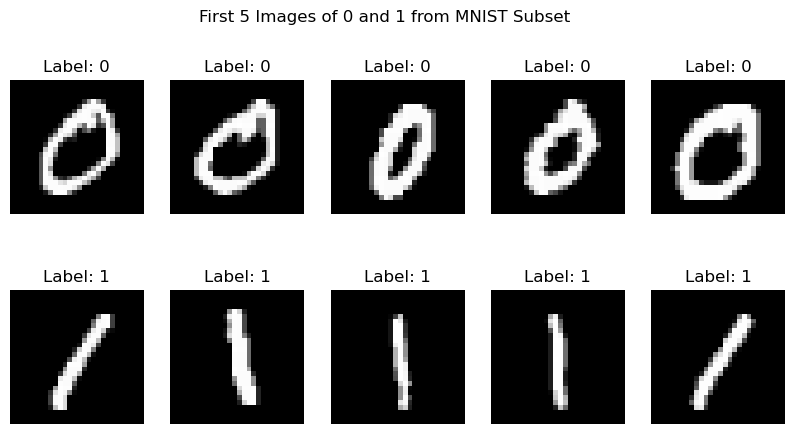

In [ ]:
import matplotlib.pyplot as plt
# Separate images for label 0 and label 1
images_0 = X[y == 0] # Get all images with label 0
images_1 = X[y == 1] # Get all images with label 1
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
# Check if the arrays have the required amount of data
if len(images_0) < 5 or len(images_1) < 5:
    print("Error: Not enough images in images_0 or images_1 to plot 5 images.")
else:
    for i in range(5):
        # Plot digit 0
        axes[0, i].imshow(images_0[i].reshape(28, 28), cmap="gray")
        axes[0, i].set_title("Label: 0")
        axes[0, i].axis("off")
        # Plot digit 1
        axes[1, i].imshow(images_1[i].reshape(28, 28), cmap="gray")
        axes[1, i].set_title("Label: 1")
        axes[1, i].axis("off")
    plt.suptitle("First 5 Images of 0 and 1 from MNIST Subset")
    plt.show()

#### 3. Initialize Weights and Bias:

In [ ]:
# Initialize weights and bias
weights = np.zeros(X.shape[1]) # 784 weights (one for each pixel)
bias = 0
learning_rate = 0.1
epochs = 100

#### Answer the Following Question:
##### 1. Question - 3: What does the weights array represent in this context?
Ans: The weights array represents the importance (contribution) of each pixel in the classification of digits 0 and 1.
i.Since each image in the dataset has 784 pixels (28x28), we initialize an array of weights with 784 values.
ii.These weights determine how much influence each pixel has on the final decision made by the model.
iii.During training, these weights are updated to minimize classification errors and improve the model's accuracy.
##### 2. Question - 4: Why are we initializing the weights to zero? What effect could this have on the training process?
We initialize the weights to zero because it is a common practice when training a simple model like a perceptron or logistic regression.

Advantages:Simple and easy to implement – The model starts from a neutral state.
Ensures consistent initialization – Prevents random starting points from affecting early learning.

Drawbacks:Symmetry Problem – If all weights are initialized to zero, all neurons update in the same way, preventing the model from learning effectively.
Slow Convergence – The model may take longer to find optimal weights.

#### 4. Implement a Decision Function or Activation Function:

In [ ]:
import numpy as np

def decision_function(X, weights, bias):
    """
    Compute the predicted labels for the input data.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - weights: Updated weights after training
    - bias: Updated bias after training

    Returns:
    - y_pred_all: The predicted labels for the input data (0 or 1)
    """
    predictions = np.dot(X, weights) + bias
    y_pred_all = np.where(predictions >= 0, 1, 0)
    return y_pred_all


#### 5. Implement the Perceptron Learning Algorithm:

In [ ]:
import numpy as np

def train_perceptron(X, y, weights, bias, learning_rate=0.1, epochs=100):
    """
    Train the perceptron using the Perceptron Learning Algorithm.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - y: Labels (true output) as a numpy array of shape (n_samples,)
    - weights: Initial weights as a numpy array of shape (n_features,)
    - bias: Initial bias value (scalar)
    - learning_rate: Learning rate for weight updates (default is 0.1)
    - epochs: Number of iterations to train the model (default is 100)

    Returns:
    - weights: Updated weights after training
    - bias: Updated bias after training
    - accuracy: Final accuracy after training
    """

    n_samples = X.shape[0]  # Number of training samples

    for epoch in range(epochs):
        correct_predictions = 0  # Track correct predictions

        for i in range(n_samples):
            # Compute prediction using step function
            prediction = np.dot(X[i], weights) + bias
            y_pred = 1 if prediction >= 0 else 0  # Step function

            # Update weights and bias if prediction is incorrect
            if y_pred != y[i]:
                update = learning_rate * (y[i] - y_pred)
                weights += update * X[i]
                bias += update
            else:
                correct_predictions += 1

        # Calculate accuracy after each epoch
        accuracy = correct_predictions / n_samples

        # Print accuracy for debugging
        print(f"Epoch {epoch+1}/{epochs} - Accuracy: {accuracy:.2f}")

    return weights, bias, accuracy


#### Answer the Following Question:
##### 1. Question - 5: What is the purpose of the output = np.dot(X[i], weights) + bias line?
This step calculates the activation function input, which helps decide whether the perceptron should output 0 or 1.

##### 2. Question - 6: What happens when the prediction is wrong? How are the weights and bias updated?
When the prediction is wrong, the perceptron updates the weights and bias using the Perceptron.

It is updated:

If y_pred (predicted label) is different from y[i] (true label):

Calculate update = learning_rate * (y[i] - y_pred), which gives either +learning_rate or -learning_rate.

If y_pred is too low, the weights increase; if y_pred is too high, the weights decrease.
The bias also updates similarly to help adjust the decision boundary.

##### 3. Question - 7:Why is the final accuracy important, and what do you expect it to be?
Final accuracy is important because it helps determine whether training is sufficient,whether the model is generalizing well to unseen data, whether hyperparameters (learning rate, epochs) need adjustment.

Working with a binary classification problem (0 vs 1) and the dataset is simple (MNIST digits 0 and 1), I expect the accuracy to reach close to 100% after training.


#### 6. Training the Perceptron Algorithm:

In [ ]:
# After training the model with the perceptron_learning_algorithm
weights, bias, accuracy = train_perceptron(X, y, weights, bias)
# Evaluate the model using the new function
print("The Final Accuracy is: ", accuracy)

Epoch 1/100 - Accuracy: 1.00
Epoch 2/100 - Accuracy: 1.00
Epoch 3/100 - Accuracy: 1.00
Epoch 4/100 - Accuracy: 1.00
Epoch 5/100 - Accuracy: 1.00
Epoch 6/100 - Accuracy: 1.00
Epoch 7/100 - Accuracy: 1.00
Epoch 8/100 - Accuracy: 1.00
Epoch 9/100 - Accuracy: 1.00
Epoch 10/100 - Accuracy: 1.00
Epoch 11/100 - Accuracy: 1.00
Epoch 12/100 - Accuracy: 1.00
Epoch 13/100 - Accuracy: 1.00
Epoch 14/100 - Accuracy: 1.00
Epoch 15/100 - Accuracy: 1.00
Epoch 16/100 - Accuracy: 1.00
Epoch 17/100 - Accuracy: 1.00
Epoch 18/100 - Accuracy: 1.00
Epoch 19/100 - Accuracy: 1.00
Epoch 20/100 - Accuracy: 1.00
Epoch 21/100 - Accuracy: 1.00
Epoch 22/100 - Accuracy: 1.00
Epoch 23/100 - Accuracy: 1.00
Epoch 24/100 - Accuracy: 1.00
Epoch 25/100 - Accuracy: 1.00
Epoch 26/100 - Accuracy: 1.00
Epoch 27/100 - Accuracy: 1.00
Epoch 28/100 - Accuracy: 1.00
Epoch 29/100 - Accuracy: 1.00
Epoch 30/100 - Accuracy: 1.00
Epoch 31/100 - Accuracy: 1.00
Epoch 32/100 - Accuracy: 1.00
Epoch 33/100 - Accuracy: 1.00
Epoch 34/100 - Accu

#### 7. Visualizing the Misclassified Image:

In [ ]:
# Get predictions for all data points
predictions = np.dot(X, weights) + bias
y_pred = np.where(predictions >= 0, 1, 0)
# Calculate final accuracy
final_accuracy = np.mean(y_pred == y)
print(f"Final Accuracy: {final_accuracy:.4f}")
# Step 5: Visualize Misclassified Images
misclassified_idx = np.where(y_pred != y)[0]
if len(misclassified_idx) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for ax, idx in zip(axes.flat, misclassified_idx[:10]): # Show 10 misclassified images
        ax.imshow(X[idx].reshape(28, 28), cmap="gray")
        ax.set_title(f"Pred: {y_pred[idx]}, True: {y[idx]}")
        ax.axis("off")
    plt.suptitle("Misclassified Images")
    plt.show()
else:
    print("All images were correctly classified!")

Final Accuracy: 1.0000
All images were correctly classified!


#### Answer the Following Question:
##### 1. Question - 8:What does misclassified idx store, and how is it used in this code?
The variable: misclassified_idx = np.where(y_pred != y)[0] stores the indices of misclassified samples in the dataset.

If there are misclassified images (len(misclassified_idx) > 0), it selects the first 10 misclassified images and plots them.

##### 2. Question - 9: How do you interpret the result if the output is ”All images were correctly classified!”?

If the output is ”All images were correctly classified!” then the perceptron achieved 100% accuracy, meaning: dataset is linearly separable, training was successful, model does not require further training.

## Task 3: Perceptron Algorithm for 3 vs 5 Classification.

In [ ]:
import pandas as pd
import numpy as np
df_0_1 = pd.read_csv(r"/content/drive/MyDrive/2025 - 6CS012 - AI and ML - Student/Week - 3 - Getting Started with Deep Learning and Neural Network/mnist_3_and_5.csv")
# Extract features and labels
X = df_0_1.drop(columns=["label"]).values # 784 pixels
y = df_0_1["label"].values # Labels (0 or 1)
# Check the shape of the features and labels
print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)

Feature matrix shape: (2741, 784)
Label vector shape: (2741,)


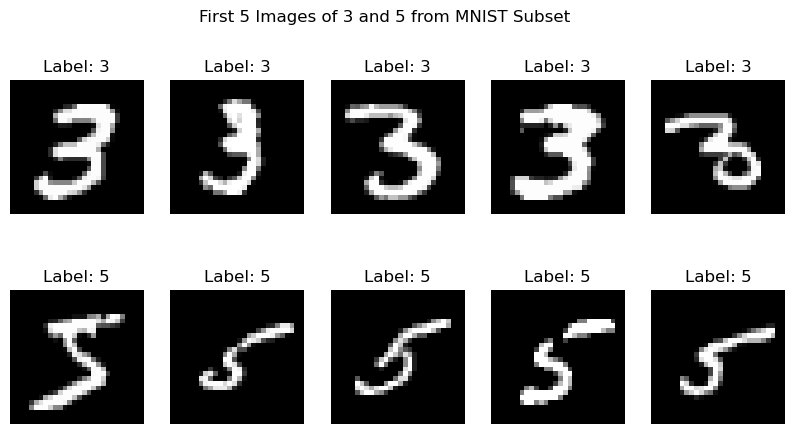

In [ ]:
import matplotlib.pyplot as plt

# Separate images for label 3 and label 5
images_3 = X[y == 3]  # Get all images with label 3
images_5 = X[y == 5]  # Get all images with label 5

fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Check if the arrays have the required amount of data
if len(images_3) < 5 or len(images_5) < 5:
    print("Error: Not enough images in images_3 or images_5 to plot 5 images.")
else:
    for i in range(5):
        # Plot digit 3
        axes[0, i].imshow(images_3[i].reshape(28, 28), cmap="gray")
        axes[0, i].set_title("Label: 3")
        axes[0, i].axis("off")

        # Plot digit 5
        axes[1, i].imshow(images_5[i].reshape(28, 28), cmap="gray")
        axes[1, i].set_title("Label: 5")
        axes[1, i].axis("off")

    plt.suptitle("First 5 Images of 3 and 5 from MNIST Subset")
    plt.show()


In [ ]:
# Initialize weights and bias
weights = np.zeros(X.shape[1]) # 784 weights (one for each pixel)
bias = 0
learning_rate = 0.1
epochs = 100

In [ ]:
import numpy as np

def decision_function(X, weights, bias):
    """
    Compute the predicted labels for the input data.
    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - weights: Updated weights after training
    - bias: Updated bias after training
    Returns:
    - y_pred_all: The predicted labels for the input data
    """
    # Compute the linear output
    predictions = np.dot(X, weights) + bias

    # Apply step function: 1 if prediction >= 0 (class 5), 0 otherwise (class 3)
    y_pred_all = np.where(predictions >= 0, 1, 0)

    return y_pred_all


In [ ]:
import numpy as np

def train_perceptron(X, y, weights, bias, learning_rate=0.1, epochs=100):
    """
    Train the perceptron using the Perceptron Learning Algorithm.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - y: Labels (true output) as a numpy array of shape (n_samples,)
    - weights: Initial weights as a numpy array of shape (n_features,)
    - bias: Initial bias value (scalar)
    - learning_rate: Learning rate for weight updates (default is 0.1)
    - epochs: Number of iterations to train the model (default is 100)

    Returns:
    - weights: Updated weights after training
    - bias: Updated bias after training
    - accuracy: Final accuracy after training
    """

    n_samples = X.shape[0]  # Number of training samples

    for epoch in range(epochs):
        correct_predictions = 0  # Track correct predictions

        for i in range(n_samples):
            # Compute prediction using step function
            prediction = np.dot(X[i], weights) + bias
            y_pred = 1 if prediction >= 0 else 0  # Step function

            # Update weights and bias if prediction is incorrect
            if y_pred != y[i]:
                update = learning_rate * (y[i] - y_pred)
                weights += update * X[i]
                bias += update
            else:
                correct_predictions += 1

        # Calculate accuracy after each epoch
        accuracy = correct_predictions / n_samples

        # Print accuracy for debugging
        print(f"Epoch {epoch+1}/{epochs} - Accuracy: {accuracy:.2f}")

    return weights, bias, accuracy


In [ ]:
# Assuming X is the training data and y are the corresponding labels (0 for 3, 1 for 5)
weights = np.zeros(X.shape[1])  # Initialize weights (assuming 784 features for each sample)
bias = 0  # Initialize bias

# Train the perceptron model
weights, bias, accuracy = train_perceptron(X, y, weights, bias)

# Print the final accuracy after training
print("The Final Accuracy is: ", accuracy)


Epoch 1/100 - Accuracy: 0.00
Epoch 2/100 - Accuracy: 0.00
Epoch 3/100 - Accuracy: 0.00
Epoch 4/100 - Accuracy: 0.00
Epoch 5/100 - Accuracy: 0.00
Epoch 6/100 - Accuracy: 0.00
Epoch 7/100 - Accuracy: 0.00
Epoch 8/100 - Accuracy: 0.00
Epoch 9/100 - Accuracy: 0.00
Epoch 10/100 - Accuracy: 0.00
Epoch 11/100 - Accuracy: 0.00
Epoch 12/100 - Accuracy: 0.00
Epoch 13/100 - Accuracy: 0.00
Epoch 14/100 - Accuracy: 0.00
Epoch 15/100 - Accuracy: 0.00
Epoch 16/100 - Accuracy: 0.00
Epoch 17/100 - Accuracy: 0.00
Epoch 18/100 - Accuracy: 0.00
Epoch 19/100 - Accuracy: 0.00
Epoch 20/100 - Accuracy: 0.00
Epoch 21/100 - Accuracy: 0.00
Epoch 22/100 - Accuracy: 0.00
Epoch 23/100 - Accuracy: 0.00
Epoch 24/100 - Accuracy: 0.00
Epoch 25/100 - Accuracy: 0.00
Epoch 26/100 - Accuracy: 0.00
Epoch 27/100 - Accuracy: 0.00
Epoch 28/100 - Accuracy: 0.00
Epoch 29/100 - Accuracy: 0.00
Epoch 30/100 - Accuracy: 0.00
Epoch 31/100 - Accuracy: 0.00
Epoch 32/100 - Accuracy: 0.00
Epoch 33/100 - Accuracy: 0.00
Epoch 34/100 - Accu

Final Accuracy: 0.0000


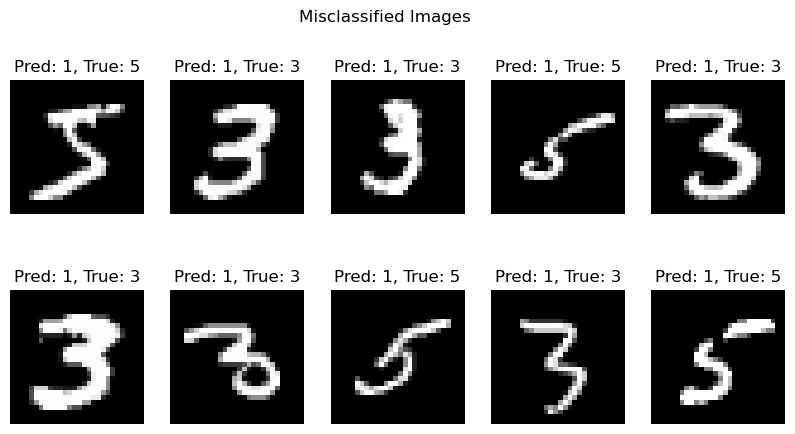

In [ ]:
# Get predictions for all data points
predictions = np.dot(X, weights) + bias
y_pred = np.where(predictions >= 0, 1, 0)  # Apply step function (1 if prediction >= 0, 0 otherwise)

# Calculate final accuracy
final_accuracy = np.mean(y_pred == y)
print(f"Final Accuracy: {final_accuracy:.4f}")

# Step 5: Visualize Misclassified Images
misclassified_idx = np.where(y_pred != y)[0]  # Find misclassified indexes

if len(misclassified_idx) > 0:
    # Display first 10 misclassified images
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for ax, idx in zip(axes.flat, misclassified_idx[:10]):
        ax.imshow(X[idx].reshape(28, 28), cmap="gray")  # Reshape to 28x28 for image display
        ax.set_title(f"Pred: {y_pred[idx]}, True: {y[idx]}")
        ax.axis("off")  # Hide axes for clarity

    plt.suptitle("Misclassified Images")
    plt.show()
else:
    print("All images were correctly classified!")